In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import pickle
%matplotlib inline

In [6]:
a =  pd.read_csv('Student_analysis.csv')

In [7]:
a.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
print(a)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [10]:
a.shape

(25, 2)

In [11]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#Statical Insights

In [12]:
a.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
a.nunique()

Hours     23
Scores    23
dtype: int64

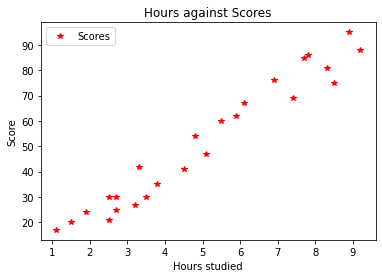

In [14]:
a.plot(x = 'Hours', y = 'Scores', style = '*', color = 'red')
plt.title('Hours against Scores')
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

In [15]:
# Statistics

<AxesSubplot:>

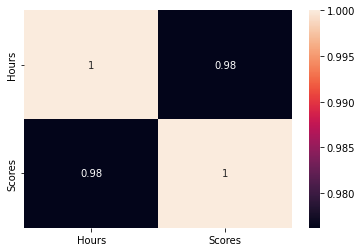

In [16]:
sns.heatmap(a.corr(), annot = True)

In [17]:
x = a.iloc[:, :-1].values
y = a.iloc[:, 1].values
print('Hours studied= ', x[0:10])
print('Score obtained= ', y[0:10])

Hours studied=  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]]
Score obtained=  [21 47 27 75 30 20 88 60 81 25]


In [18]:
# Train & test , dataset- 70-80% as training & 20-30% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.24, random_state=42)

In [19]:
regr = LinearRegression()
regr.fit(x_train, y_train)
print('Training Complete')

Training Complete


In [20]:
# Save the model
pickle.dump(regr, open('srishti.pkl', 'wb'))

In [21]:
print('Coefficient=', regr.coef_)

Coefficient= [9.60328059]


In [22]:
print('Intercept=', regr.intercept_)

Intercept= 3.435969636534537


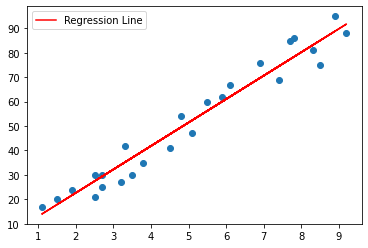

In [23]:
# Plot the regression
line = regr.coef_*x + regr.intercept_

plt.scatter(x,y)
plt.plot(x, line, color ='red', label = 'Regression Line')
plt.legend()
plt.show()

In [24]:
print(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]]


In [25]:
y_pred = regr.predict(x_test)

In [26]:
b =pd.DataFrame({'Original': y_test, "Predicted": y_pred})
b

,Original,Predicted
0,81,83.143199
1,30,27.444171
2,21,27.444171
3,76,69.698606
4,62,60.095325
5,25,29.364827


In [27]:
print('Training Score:', regr.score(x_train, y_train))
print('Testing Score:', regr.score(x_test, y_test))

Training Score: 0.9475373814076595
Testing Score: 0.9684201924053588


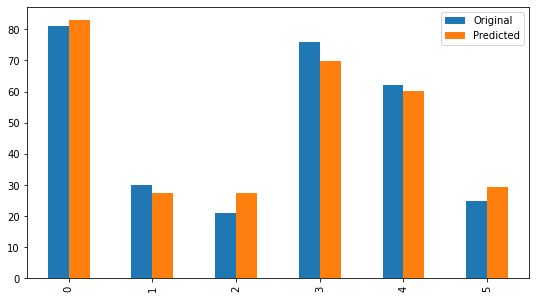

In [28]:
b.plot(kind='bar', figsize=(9,5))
plt.show()

In [31]:
hours = float(input('Enter the number hours studeied: '))
test= np.array([hours])
test=test.reshape(-1,1)
own_pred= regr.predict(test)
print('No of hours = {}'.format(hours))
print('Predicted Score={}'.format(own_pred[0]))

Enter the number hours studeied: 21
No of hours = 21.0
Predicted Score=205.10486202018964


In [29]:
from sklearn import metrics

In [30]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  3.952349156423974


In [31]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error:  19.173329294335378


In [32]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error:  4.378736038440246
